In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
from qiskit.compiler import transpile, assemble
import numpy as np
# from qiskit.circuit.library import QFT

In [ ]:
def QFT(n, state):
    qc = QuantumCircuit(n)
    for i,j in enumerate(state):
        if  i == 1:
            qc.x(j)
    qc.barrier()
    for i in range(n):
        # i target j is control
        qc.h(i)
        for j in (range(i+1,n)):
            qc.cp(np.pi/2**j,j,i)
        qc.barrier()
    # qc.measure_all()
    return qc

In [ ]:
def IQFT(n):
    qc = QuantumCircuit(n)
    for i in range(n):
        # i target j is control
        qc.h(i)
        for j in (range(i+1,n)):
            qc.cp(-np.pi/2**j,j,i)
        qc.barrier()
    qc.measure_all()
    return qc

In [ ]:
# quantum_info.Statevector([0.5, 0.25, 0.25, 0.5,0.5, 0.25, 0.25, 0.5])

In [ ]:
# Q = QFT(2,[0,1])
# quantum_info.Statevector(Q).draw('latex')

In [ ]:
n,m = 3,1
qc = QuantumCircuit(QuantumRegister(n, 'Q'), QuantumRegister(m, 'U'))
for i in range(n):
    qc.h(i)
for i in (range(n)):
    qc.cp(np.pi/8,i,3)

qc.QFT(num_qubits=None, approximation_degree=0, do_swaps=False, inverse=True, insert_barriers=False, name='qft')
# qc.measure_all()


qc.draw('mpl')

In [ ]:
quantum_info.Statevector(qc).draw('latex')

In [2]:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [3]:
def QPE(n):
    qpe_circ = QuantumCircuit(n, n-1)
    qpe_circ.x(n-1)
    for qubit in range(n-1):
        qpe_circ.h(qubit)
    
    repetitions = 1
    for counting_qubit in range(n-1):
        for i in range(repetitions):
            qpe_circ.cp(2*np.pi*(0.78), counting_qubit, n-1); # This is CU
        repetitions *= 2
    
    qpe_circ.barrier()
    # Apply inverse QFT
    qft_dagger(qpe_circ, n-1)
    # Measure
    qpe_circ.barrier()
    for n in range(n-1):
        qpe_circ.measure(n,n)
    
    return qpe_circ

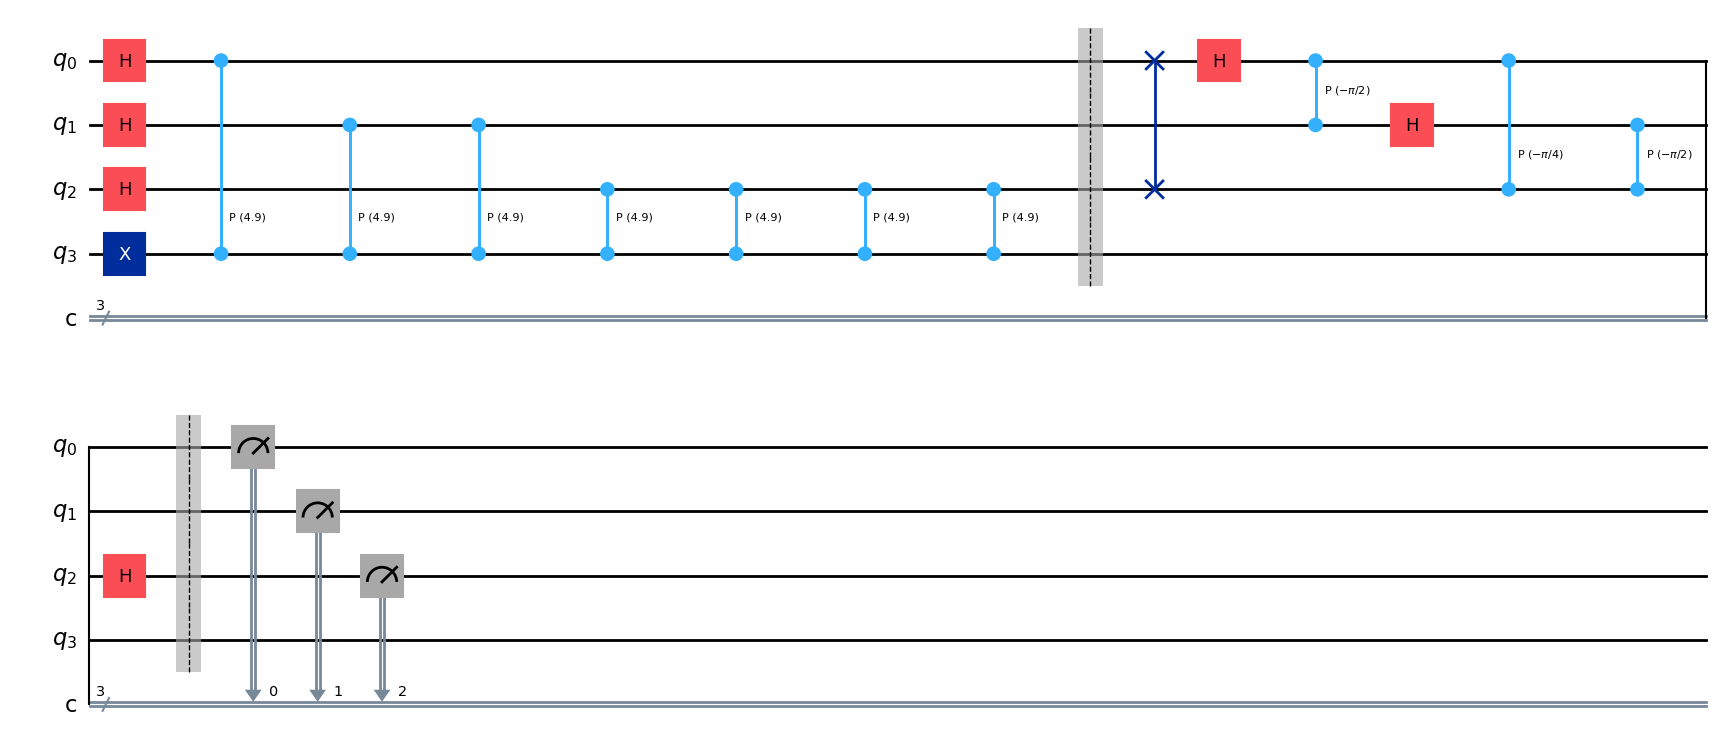

In [7]:
qc = QPE(4)
qc.draw('mpl')

C:\Users\souvi\AppData\Local\Temp\ipykernel_7016\2553411278.py:5: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


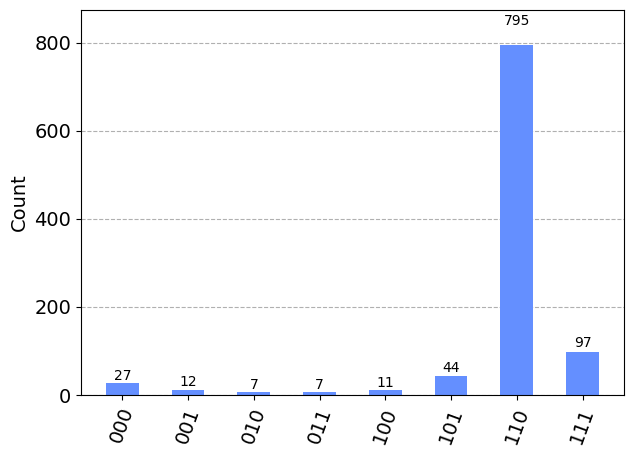

In [8]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 1000
t_qpe = transpile(qc, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)